## Training

Use Auto ML lib `pycaret` to automate model training and model selection.

In [1]:
import os
os.chdir("..")
!pwd

/c/TungGpu/ml-it/code/sagemaker-r2


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from collections import Counter
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek, SMOTEENN

## Load data

In [3]:
DATA_DIR = Path("./data")
TMP_DIR = Path("./tmp")
DATA_CSV = DATA_DIR / "full/train.csv"

In [4]:
df = pd.read_csv(DATA_CSV)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,-0.732,1.14251,3,0.003423,-0.262,33831,-0.120,-0.109,0.694307,0.997923,88.184721,74.7715,0.787,21,-0.005000,-0.00457,0.801131,-0.143,-0.055,-0.005,-0.117,0.003361,0.66388,-0.005,-0.054,3170.06,-0.784,-0.060,-0.686,-0.435,-3.350108,0.889,96.3255,-0.564,-0.469,-0.028,-0.133,-21.4902,106.7920,1.49544,704.956,0.351,-0.024,-0.098,0.178543,9.62,515.012,-0.146,5490.13,-0.028,105.2190,0.995525,-0.00204,-1.604,0,0.005325,67226.0,0.00372,-0.089,3.42085,0.001932,0.181023,1.968,-212.318,0.00397,0.500892,-0.00280,0.00466,-1.904041,5190.98,0.001948,-0.426,-0.10300,1.19102,-0.032,0.927649,-0.024,21.4711,0.00368,0.004564,3138.67,0.01959,21,0.482589,-0.307,0,-0.12259,3.09698,-0.360732,0.005135,0.179927,1.49193,-0.012,3.10686,-0.00579,-0.18553,-0.122263,-0.12373,189.092,2052.68,-0.548,3.49045,-232.8,6,-0.021,-0.089,0.01107,-0.058,1.16655,21.4029,1.08095,0.010073,1.837,0.255,0.385121,6913.68,1.19125,1132,1.09259,0.204294,0.001265,-1.148,0.070,-0.035,1.08133,-0.031,-0.008000,-0.458764,0.481826,-0.062,66676.1,-0.658,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,-0.715,1.80633,3,0.004003,-0.292,13436,-0.284,-0.102,1.816916,1.001320,133.148294,73.0013,0.223,82,0.000652,-0.01296,0.801101,-0.090,-0.023,-0.228,-0.107,0.004248,0.64013,-0.560,-0.055,3799.00,-0.840,-0.063,-0.846,-0.335,0.009949,0.211,93.2053,-0.445,-0.481,-0.354,-0.105,-18.5995,73.7407,1.49699,966.937,-0.623,-0.042,-0.110,0.180113,4.34,482.997,3.234,6243.08,-0.025,73.1009,0.994811,-0.00224,0.552,0,0.004956,67841.0,0.00771,0.170,3.48121,-0.003156,0.181066,-0.312,-171.503,0.00505,0.225318,-0.00148,-0.00308,2.465348,5759.22,-0.009400,-0.258,-0.11513,1.18592,-0.507,1.828688,-0.023,21.3636,-0.00712,0.000381,3536.88,-0.00634,82,0.482602,-0.272,0,-0.12232,3.09066,-0.080839,-0.002860,0.200937,1.50898,-0.029,3.10072,0.00746,-0.18674,-0.125014,-0.12270,216.287,2349.23,-0.476,3.49726,11.5,2,-0.045,-0.054,-0.00694,-0.073,1.15355,21.3422,1.08186,0.000000,-0.169,-1.168,-0.128346,6995.61,1.21638,3264,1.09616,0.200889,0.002094,0.733,0.216,-0.040,1.08129,-0.061,-0.004825,0.154446,0.482792,-0.347,66715.4,-0.839,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,0.456,1.19857,4,0.005529,-0.316,26894,-0.148,-0.101,-0.514663,0.997676,127.044605,74.6132,0.901,73,-0.002503,-0.00687,0.795001,-0.188,-0.093,-0.035,-0.150,0.004253,0.67838,-0.035,-0.082,3061.70,0.291,-0.065,-0.204,-0.488,-2.275190,0.801,95.0316,1.272,2.453,-0.065,-0.184,-17.8527,93.0292,1.50489,683.744,0.031,-0.049,-0.078,0.179013,-74.76,448.331,-0.302,5367.35,-0.029,91.8613,0.996249,-0.00391,0.641,0,0.003050,66807.2,0.00773,0.375,3.47297,-0.000141,0.180348,-0.391,-164.190,-0.00670,-2.152940,-0.00391,-0.00756,-3.097850,5160.00,-0.009642,-0.387,-0.10152,1.20644,0.965,0.050663,-0.046,21.5870,0.00353,0.005148,2942.89,-0.02731,73,0.480137,-0.379,1,-0.12413,3.10466,-0.686895,0.008008,0.194851,1.49082,-0.041,3.08993,0.00883,-0.18328,-0.122755,-0.12451,184.724,2031.26,1.580,3.45300,-110.0,3,-0.057,-0.067,-0.00227,-0.154,1.16579,21.5364,1.08200,-0.006764,-0.190,-0.483,0.068413,6634.91,1.18248,2654,1.09632,0.197141,-0.002956,0.478,-0.074,-0.035,1.08181,-0.051,0.012258,-0.446567,0.480328,-0.044,66147.2,1.090,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.0827

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Columns: 152 entries, 0 to target
dtypes: float64(143), int64(9)
memory usage: 11.9 MB


In [6]:
target_names = np.unique(df['target'])
target_names

array([0, 1, 2, 3, 4], dtype=int64)

## Split data

In [7]:
random_seed = 17
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=random_seed, stratify=y)

In [8]:
Counter(y_train)

Counter({0: 8999, 4: 26, 2: 53, 1: 91, 3: 47})

In [9]:
Counter(y_test)

Counter({0: 1001, 2: 6, 3: 5, 4: 3, 1: 10})

## Simple predictor: Return majority label

In [10]:
def simple_pred(x):
    return np.zeros(x.shape[0])

In [11]:
y_pred = simple_pred(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1001
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.98      1025
   macro avg       0.20      0.20      0.20      1025
weighted avg       0.95      0.98      0.97      1025



**NOTE**: Returning the majority class achieves 98% accuracy!

## Setup pycaret env

In [12]:
train_ds = pd.DataFrame(X_train)
train_ds['target'] = y_train
test_ds = pd.DataFrame(X_test)
test_ds['target'] = y_test

In [13]:
train_ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,0.613817,-0.145,-0.291,0.509,-0.312,-0.076,-0.318,9.99638,-0.046,430.277,-0.630,1.12620,4.0,0.006484,-0.322,24777.0,-0.422,-0.096,-0.035372,1.001030,84.041479,76.0649,-0.349,26.0,0.003383,-0.00228,0.797576,-0.212,-0.096,-0.037,-0.181,0.003449,0.65919,-0.037,-0.047,3017.92,0.089,-0.068,0.696,-0.486,0.156430,0.528,97.7977,1.270,-0.209,-0.067,-0.157,-17.2533,90.0113,1.50441,643.496,1.201,-0.085,-0.103,0.181622,4.19,449.947,0.996,4699.47,-0.031,89.0503,0.997072,-0.00353,-1.883,0.0,0.004386,66169.3,0.00517,-0.585,3.41978,-0.009832,0.180478,1.041,-188.325,0.01122,0.216292,-0.00468,0.00246,-0.814167,4510.83,0.008212,-0.339,-0.11438,1.19138,-0.089,-1.027646,-0.074,21.8659,-0.00859,0.004005,2928.47,0.03351,26.0,0.479018,-0.220,1.0,-0.12287,3.09772,0.048718,0.000000,0.168403,1.50235,-0.040,3.10795,-0.00845,-0.18769,-0.121636,-0.12326,174.661,1794.65,-0.294,3.42272,22.9,10.0,-0.041,-0.069,0.01142,-0.073,1.16331,21.8251,1.08277,0.003762,-0.230,0.141,-0.133674,6684.94,1.19671,1325.0,1.09726,0.203354,0.001259,-1.537,0.137,-0.040,1.08220,-0.063,0.010623,-0.359336,0.479399,-0.065,65912.9,0.181,716.4,-0.037,0.048134,10.599,-1.048838,-0.17990,-0.12287,0.049469,17.7969,0
1,-0.986000,-0.143,1.017,-0.505,-0.407,-0.128,-0.332,11.09550,-0.051,441.263,0.307,1.75124,0.0,-0.001905,1.500,23863.0,-0.058,-0.241,-0.598024,1.000600,141.047169,72.9935,-0.600,5085.0,0.001804,-0.00077,0.798611,-0.187,-0.088,-0.024,-0.144,0.004224,0.67869,-0.024,-0.059,3319.73,0.874,2.315,-0.018,-0.352,1.083932,0.853,93.3859,1.096,-0.323,-0.043,-0.102,-16.2884,82.7565,1.50612,906.711,-1.061,-0.052,-0.069,0.180358,9.21,471.907,-0.152,5513.65,-0.026,81.7846,0.995098,-0.00305,1.241,0.0,-0.000381,67736.3,0.00771,-2.121,3.42496,0.008083,0.180930,-0.512,-168.883,-0.00188,0.425385,-0.00343,0.00603,-0.537562,5324.67,-0.009884,-0.405,-0.12121,1.21339,-0.192,0.326995,-0.047,21.2730,-0.01571,0.002476,3172.38,-0.02151,5086.0,0.483195,-0.222,2.0,-0.11663,3.10813,0.075829,-0.002095,0.184460,1.49549,-0.029,3.08848,0.00405,-0.18448,-0.115427,-0.11625,192.422,2268.71,-0.258,3.44966,98.1,10.0,-0.042,-0.117,0.00944,-0.120,1.15747,21.2836,1.08220,-0.004873,-0.176,-1.049,0.773825,6934.02,1.20973,2733.0,1.09611,0.198654,-0.000473,0.572,-0.831,-0.061,1.08258,-0.045,-0.000516,-0.363208,0.483005,-0.074,67270.2,0.263,842.7,-0.050,0.042687,12.554,0.248371,-0.18149,-0.11625,0.045925,17.2462,0
2,-0.662374,-0.107,-0.303,-1.310,-0.316,-0.240,-0.233,10.50750,-0.046,479.883,-0.641,1.06439,0.0,-0.000763,-0.328,22010.0,-0.096,-0.152,1.766096,1.000370,132.808557,75.5345,3.029,133.0,-0.005231,-0.00305,0.802798,-0.139,-0.063,-0.003,-0.129,0.005049,0.67379,-0.003,-0.103,3092.93,0.534,-0.066,0.669,-0.304,-0.697806,0.658,96.1348,5.968,6.004,-0.027,-0.140,-19.0619,101.4270,1.50488,672.256,-0.129,-0.030,-0.082,0.180211,14.72,505.147,-0.182,5342.04,-0.029,100.7590,0.996309,-0.00290,0.767,0.0,0.004956,66466.7,0.00171,-2.078,3.41299,0.004357,0.180020,-0.268,-189.366,0.00973,0.769673,-0.00252,0.00342,-3.099749,4881.61,-0.008169,1.452,-0.10224,1.19283,0.708,0.839843,-0.019,22.2056,-0.00734,0.001525,3208.65,-0.01366,135.0,0.482349,-0.310,2.0,-0.12459,3.10180,1.283345,0.002288,0.205762,1.50867,-0.019,3.09827,0.00441,-0.22378,-0.124031,-0.12497,208.436,1919.60,2.359,3.45134,-54.1,3.0,-0.029,-0.092,0.00079,-0.114,1.15291,22.1415,1.08262,-0.001400,-0.117,0.954,-0.333066,7148.00,1.21649,3958.0,1.09673,0.198331,-0.001223,0.523,-0.339,-0.045,1.08243,2.303,0.002323,0.011382,0.482730,-0.064,65917.0,0.808,638.8,-0.003,0.047157,-12.351,0.7402

In [14]:
test_ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,-0.345945,-0.125,-0.166,0.438,-0.239,1.474,-0.292,9.41948,-0.045,462.236,-0.588,1.06344,3.0,0.002289,-0.313,34306.0,-0.118,-0.095,0.013490,0.998587,139.367355,72.4311,-0.336,85.0,0.000356,-0.01296,0.794412,-0.249,-0.079,-0.008,-0.156,0.001638,0.68044,-0.008,-0.127,3000.23,1.041,-0.058,-0.337,-0.241,0.805337,0.619,93.5887,0.517,-0.366,-0.040,-0.125,-17.5875,135.0510,1.50877,637.343,0.641,-0.020,-0.072,0.179700,3.53,501.443,-0.259,5188.09,-0.029,133.1670,0.994329,-0.00265,0.308,0.0,0.004196,66244.1,0.00576,-0.459,3.46307,-0.000548,0.179891,0.791,-186.938,-0.00270,0.154720,-0.00379,-0.00617,1.653683,4959.70,0.007186,-0.391,-0.10446,1.18359,-1.183,-1.343180,-0.035,22.5706,0.00654,0.004959,2833.84,0.01343,85.0,0.481242,-0.235,3.0,-0.12388,3.08956,1.348034,0.007819,0.239735,1.49926,-0.006,3.09607,0.00360,-0.18373,-0.125312,-0.12769,223.010,1789.41,-0.508,3.46286,67.6,0.0,-0.012,-0.040,-0.00783,-0.104,1.16796,22.5331,1.08147,0.005094,1.718,-0.182,-0.857796,6697.83,1.21284,2521.0,1.09595,0.202573,0.002535,-0.074,-0.178,-0.038,1.08204,-0.013,0.013902,0.279940,0.481052,-0.068,65973.3,0.508,607.0,-0.008,0.048133,0.610,-1.343257,-0.18594,-0.12388,0.048133,17.6512,0
1,-0.041140,-0.112,-0.330,-0.078,-0.305,-0.057,-0.281,9.70735,-0.056,440.925,0.425,1.16891,10.0,0.002854,-0.318,19102.0,-0.217,-0.085,-0.471625,0.999635,77.769853,74.3401,0.611,29.0,0.002932,-0.00534,0.801707,2.011,-0.105,-0.008,-0.247,0.003788,0.65938,-0.008,-0.039,2997.64,-0.954,-0.071,0.396,-0.453,-2.330408,0.382,96.2608,-0.404,-0.281,-0.022,-0.173,-16.2474,125.4170,1.51077,636.007,-0.124,-0.015,-0.095,0.180872,15.12,444.107,-0.257,4883.51,-0.031,124.3440,0.993526,-0.00521,-1.449,0.0,0.005138,66282.4,-0.01093,0.567,3.48356,-0.002600,0.179728,-0.370,-180.466,0.00572,0.602847,-0.00521,-0.00377,-1.950792,4724.76,-0.035307,-0.306,-0.11437,1.21646,-0.595,0.968036,-0.038,22.0829,-0.03448,0.003235,2863.29,0.03157,29.0,0.481091,-0.262,0.0,-0.11653,3.09170,-0.160031,0.003806,0.157535,1.50220,-0.008,3.09551,-0.00851,-0.18515,-0.114376,-0.11615,175.005,1756.08,-0.264,3.49056,-134.9,6.0,-0.014,-0.060,-0.00170,-0.068,1.16808,22.0773,1.08248,0.003447,-0.177,-0.396,0.452582,6942.92,1.21483,1571.0,1.09716,0.199362,-0.003059,-0.722,0.296,-0.032,1.08267,-0.032,0.012000,-0.390269,0.481091,-0.067,66008.9,0.394,768.4,-0.060,0.045024,11.905,0.870211,-0.22386,-0.11577,0.045975,17.5921,0
2,1.111356,-0.161,-0.244,-0.392,3.657,-0.156,-0.310,11.21120,-0.051,483.944,-0.732,1.18801,5.0,0.000381,-0.262,31556.0,-0.120,-0.109,0.146911,1.000970,104.979570,76.4981,-0.431,1432.0,-0.004875,-0.00535,0.795921,-0.143,-0.055,-0.005,-0.117,0.003607,0.66419,-0.005,-0.054,3095.57,0.512,-0.060,0.219,0.937,0.136291,0.889,96.9103,1.008,0.512,-0.028,-0.133,-24.5057,101.5290,1.49798,711.480,0.351,-0.024,-0.098,0.179549,9.83,502.495,-0.146,5178.83,-0.028,100.8860,0.996227,-0.00136,-0.111,0.0,0.005717,66137.8,-0.00025,0.706,3.50016,-0.001349,0.179358,0.852,-214.213,0.00603,0.511017,-0.00136,0.00036,2.645170,4980.22,-0.007115,-0.426,-0.10454,1.21641,-0.873,-0.567163,-0.024,21.5580,0.01378,0.006670,3016.75,0.01017,1432.0,0.479818,-0.307,1.0,-0.11659,3.10091,-0.032332,0.001525,0.203351,1.49711,-0.012,3.10967,-0.00216,-0.22266,-0.119890,-0.11850,206.266,2001.95,0.677,3.45962,-4.8,3.0,-0.021,-0.089,0.00817,-0.058,1.16704,21.5364,1.08131,0.006603,-0.209,1.412,-0.307308,6793.93,1.21236,2155.0,1.09486,0.199198,-0.001095,0.265,0.967,-0.035,1.08074,-0.031,0.010361,-0.092182,0.479628,-0.062,65840.6,-0.193,678.5,-0.005,0.053318,-19.430,-0.64

### Baseline: No pyret preprocessing

In [18]:
include=['et', 'lightgbm', 'lr', 'dt', 'svm', 'mlp', 'rf', 'ada']

In [15]:
exp_baseline = setup(
    data=train_ds,
    train_size=0.8, # split training and validation
    test_data=test_ds,
    target='target',
    session_id=random_seed,
    use_gpu=True,
    
    data_split_shuffle=True,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold",
    fold=10,
            
    imputation_type='simple', # there's a small number of missing values
    numeric_imputation='mean', # use mean to replace missing values
    
    fix_imbalance=False,
    # fix_imbalance_method=SMOTETomek(), # imblearn's method
    
    remove_outliers=False,
    outliers_threshold=0.05, # percentage of outliers in distribution's tail
            
    normalize=False,
    normalize_method='zscore', # z=(x-u)/s
    transformation=False,
    transformation_method="yeo-johnson",
            
    feature_interaction=False, # create a*b features
    feature_ratio=False, # create a/b features
    interaction_threshold=0.01, # threshold feature importance
            
    polynomial_features=False,
    polynomial_degree=2,
    polynomial_threshold=0.1,
            
    trigonometry_features=False, # create tan(x), sin(x), cos(x)
    
    feature_selection=False, # use tree models to compute feature importance
    feature_selection_threshold=0.8,
    
    remove_multicollinearity=False, # drop highly correlated features
    multicollinearity_threshold=0.9,
            
    pca=False, # reduce feature space dimension
    pca_method="linear",
    pca_components=0.99, # % components to keep
    
    log_experiment="mlflow",
    log_plots=True,
)

,Description,Value
0,session_id,17
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9216, 152)"
5,Missing Values,True
6,Numeric Features,151
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models(sort='F1', include=include)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9880,0.9914,0.5736,0.9848,0.9846,0.6606,0.6940,9.4300
dt,Decision Tree Classifier,0.9811,0.8283,0.5905,0.9813,0.9808,0.5879,0.5898,3.0160
rf,Random Forest Classifier,0.9857,0.9748,0.5438,0.9811,0.9808,0.5716,0.6230,2.2610
lr,Logistic Regression,0.9821,0.8486,0.4746,0.9714,0.9754,0.4351,0.4949,4.5840
et,Extra Trees Classifier,0.9825,0.9496,0.4373,0.9670,0.9745,0.4194,0.5058,1.0600
ada,Ada Boost Classifier,0.9805,0.6155,0.3983,0.9647,0.9725,0.3726,0.4641,4.3510
mlp,MLP Classifier,0.9704,0.6303,0.3761,0.9644,0.9665,0.2486,0.2835,4.4710
svm,SVM - Linear Kernel,0.9735,0.0000,0.2521,0.9586,0.9652,0.1063,0.1215,0.2620


In [17]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=17, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


### Exp 01 - Fix imbalance by using SMOTETomek()

In [ ]:
exp_01 = setup(
    data=train_ds,
    train_size=0.8, # split training and validation
    test_data=test_ds,
    target='target',
    session_id=random_seed,
    use_gpu=True,
    
    data_split_shuffle=True,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold",
    fold=10,
            
    imputation_type='simple', # there's a small number of missing values
    numeric_imputation='mean', # use mean to replace missing values
    
    fix_imbalance=False,
    # fix_imbalance_method=SMOTETomek(), # imblearn's method
    
    remove_outliers=False,
    outliers_threshold=0.05, # percentage of outliers in distribution's tail
            
    normalize=False,
    normalize_method='zscore', # z=(x-u)/s

    transformation=False,
    transformation_method="yeo-johnson",
            
    feature_interaction=False, # create a*b features
    feature_ratio=False, # create a/b features
    interaction_threshold=0.01, # threshold feature importance
            
    polynomial_features=False,
    polynomial_degree=2,
    polynomial_threshold=0.1,
            
    trigonometry_features=False, # create tan(x), sin(x), cos(x)
    
    feature_selection=False, # use tree models to compute feature importance
    feature_selection_threshold=0.8,
    
    remove_multicollinearity=False, # drop highly correlated features
    multicollinearity_threshold=0.9,
            
    pca=False, # reduce feature space dimension
    pca_method="linear",
    pca_components=0.99, # % components to keep
    
    log_experiment="mlflow",
    log_plots=True,
)

In [16]:
best = compare_models(sort='F1', include=include)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9880,0.9914,0.5736,0.9848,0.9846,0.6606,0.6940,9.4300
dt,Decision Tree Classifier,0.9811,0.8283,0.5905,0.9813,0.9808,0.5879,0.5898,3.0160
rf,Random Forest Classifier,0.9857,0.9748,0.5438,0.9811,0.9808,0.5716,0.6230,2.2610
lr,Logistic Regression,0.9821,0.8486,0.4746,0.9714,0.9754,0.4351,0.4949,4.5840
et,Extra Trees Classifier,0.9825,0.9496,0.4373,0.9670,0.9745,0.4194,0.5058,1.0600
ada,Ada Boost Classifier,0.9805,0.6155,0.3983,0.9647,0.9725,0.3726,0.4641,4.3510
mlp,MLP Classifier,0.9704,0.6303,0.3761,0.9644,0.9665,0.2486,0.2835,4.4710
svm,SVM - Linear Kernel,0.9735,0.0000,0.2521,0.9586,0.9652,0.1063,0.1215,0.2620


### Exp 01 - Fix imbalance by using SMOTETomek()

In [15]:
include=['et', 'lightgbm', 'lr', 'dt', 'rf']

In [16]:
exp_01 = setup(
    data=train_ds,
    train_size=0.8, # split training and validation
    test_data=test_ds,
    target='target',
    session_id=random_seed,
    use_gpu=True,
    
    data_split_shuffle=True,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold",
    fold=10,
            
    imputation_type='simple', # there's a small number of missing values
    numeric_imputation='mean', # use mean to replace missing values
    
    fix_imbalance=True,
    fix_imbalance_method=SMOTETomek(), # imblearn's method
    
    remove_outliers=False,
    outliers_threshold=0.05, # percentage of outliers in distribution's tail
            
    normalize=False,
    normalize_method='zscore', # z=(x-u)/s

    transformation=False,
    transformation_method="yeo-johnson",
            
    feature_interaction=False, # create a*b features
    feature_ratio=False, # create a/b features
    interaction_threshold=0.01, # threshold feature importance
            
    polynomial_features=False,
    polynomial_degree=2,
    polynomial_threshold=0.1,
            
    trigonometry_features=False, # create tan(x), sin(x), cos(x)
    
    feature_selection=False, # use tree models to compute feature importance
    feature_selection_threshold=0.8,
    
    remove_multicollinearity=False, # drop highly correlated features
    multicollinearity_threshold=0.9,
            
    pca=False, # reduce feature space dimension
    pca_method="linear",
    pca_components=0.99, # % components to keep
    
    log_experiment="mlflow",
    log_plots=True,
)

,Description,Value
0,session_id,17
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9216, 152)"
5,Missing Values,True
6,Numeric Features,151
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best = compare_models(sort='F1', include=include)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9883,0.9900,0.6307,0.9866,0.9862,0.6894,0.7088,21.7220
rf,Random Forest Classifier,0.9843,0.9839,0.4528,0.9769,0.9783,0.5038,0.5720,14.2940
et,Extra Trees Classifier,0.9820,0.9438,0.4053,0.9652,0.9734,0.3849,0.4829,7.6250
dt,Decision Tree Classifier,0.9593,0.7748,0.5454,0.9748,0.9663,0.3714,0.3889,13.6820
lr,Logistic Regression,0.6730,0.8493,0.6370,0.9749,0.7906,0.0663,0.1505,32.9280


In [18]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=17, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


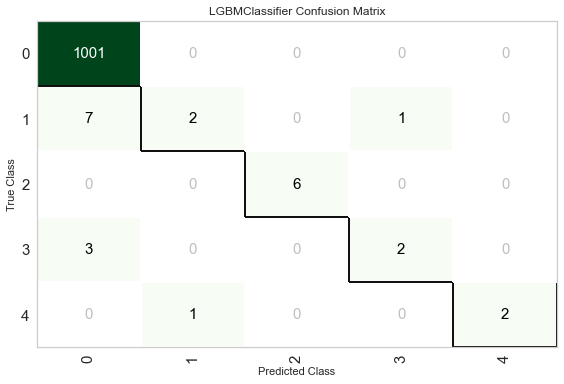

In [19]:
plot_model(best, plot = 'confusion_matrix')

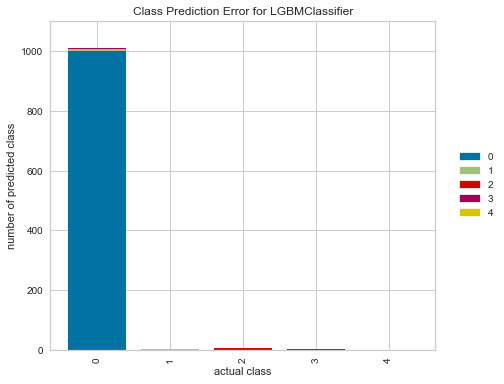

In [20]:
plot_model(best, plot = 'error')

In [21]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9883,0.9552,0.6533,0.9855,0.9854,0.6807,0.7064


,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,target,Label,Score
0,-0.345945,-0.125,-0.166,0.438,-0.239,1.474,-0.292,9.41948,-0.045,462.235992,...,0.048133,0.610,-1.343257,-0.18594,-0.12388,0.048133,17.651199,0,0,1.0000
1,-0.041140,-0.112,-0.330,-0.078,-0.305,-0.057,-0.281,9.70735,-0.056,440.924988,...,0.045024,11.905,0.870211,-0.22386,-0.11577,0.045975,17.592100,0,0,1.0000
2,1.111356,-0.161,-0.244,-0.392,3.657,-0.156,-0.310,11.21120,-0.051,483.944000,...,0.053318,-19.430,-0.642061,-0.22273,-0.11926,0.062465,17.453400,0,0,0.9998
3,0.261004,-0.261,-0.182,-0.959,-0.228,-0.106,-0.263,10.32360,-0.059,449.238007,...,0.036729,13.747,1.393390,-0.17587,-0.12021,0.039017,17.146000,0,0,1.0000
4,0.692616,-0.172,-0.276,0.920,1.031,-0.207,-0.298,10.11720,-0.077,420.359009,...,0.050896,8.082,0.451926,-0.18006,-0.12675,0.049943,17.444099,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-0.071219,-0.084,-0.298,-0.062,-0.321,-0.071,-0.235,9.40994,-0.045,401.981995,...,0.052633,13.004,-1.037063,-0.17720,-0.12580,0.053205,17.496201,0,0,1.0000
1021,-0.824065,-0.182,-0.223,-0.476,-0.300,-0.190,-0.315,9.99362,-0.038,458.207001,...,0.055049,-8.119,-1.010057,-0.21953,-0.12516,0.048378,17.433701,0,0,1.0000
1022,-0.205244,-0.102,-0.377,0.376,-0.308,1.907,-0.506,11.43130,-0.048,453.877991,...,0.046738,12.891,-1.004064,-0.18136,-0.10895,0.052076,17.012899,0,0,1.0000
1023,-0.256855,-0.075,-0.203,0.247,-0.251,-0.135,-0.328,9.41912,-0.064,413.920013,...,0.045616,7.987,-0.161252,-0.22112,-0.12827,0.049049,17.797400,0,0,1.0000


**NOTE**: After playing with several models, lightgbm seems to be one of the top model we should use to move on the next task which is model fine tuning.

In fact, we should try more than 1 model in the fine tuning step because data preparation, model training and model fine tuning are in a cycle. Because of the limited time, I will use only one model and I will not iterate back to the data preparation step.